In [27]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
p1 = np.array([1,1])
p2 = np.array([4,4])

In [5]:
np.power(p2 - p1 , 2)

array([9, 9], dtype=int32)

In [6]:
np.sqrt(np.sum(np.power(p2 - p1 , 2)))

4.242640687119285

In [7]:
def distance(p1,p2):
    """Find the distance between two point"""
    dist = np.sqrt(np.sum(np.power(p2 - p1 , 2)))
    return dist

In [16]:
def majority_vote(votes):
    """ Return the most common element in votes traditional method"""
    vote_counts ={}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote]+=1
        else:
            vote_counts[vote] = 1
    
    winners = []
    max_count = max(vote_counts.values())
    for vote , count in vote_counts.items():
        if count == max_count:
            winners.append(vote)
    
    return random.choice(winners)

In [17]:
votes = [1,2,3,1,2,3,1,2,3,3,3]

In [18]:
vote_counts = majority_vote(votes)

In [19]:
vote_counts

3

In [20]:
import scipy.stats as ss

In [21]:
def majority_vote_fast(votes):
    """ Return the most common element in votes using scipy_stats"""
    mode , count = ss.mstats.mode(votes)
    return mode

In [23]:
points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])

In [24]:
p = np.array([2.5,2])

(0.5, 3.5, 0.5, 3.5)

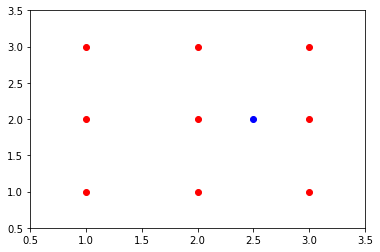

In [35]:
plt.plot(points[:,0],points[:,1],"ro")
plt.plot(p[0],p[1],"bo")
plt.axis([.5,3.5,.5,3.5])

In [33]:
points[0:,1]

array([1, 2, 3, 1, 2, 3, 1, 2, 3])

In [37]:
def find_nearest_neighbors(p , points , k=5):
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p,points[i])
    ind = np.argsort(distances)
    return ind[:k]

In [39]:
ind = find_nearest_neighbors(p,points,3)
print(points[ind])

[[2 2]
 [3 2]
 [2 1]]


In [40]:
def knn_predict(p,points,outcomes ,k=5):
    ind = find_nearest_neighbors(p,points,k)
    return majority_vote(outcomes[ind])

In [41]:
outcomes = np.array([0,0,0,0,1,1,1,1,1])

In [42]:
len(outcomes)

9

In [43]:
knn_predict(np.array([2.5,2.7]) , points,outcomes,k=2)

1

In [44]:
knn_predict(np.array([1,2.7]) , points,outcomes,k=2)

0